   Wavelength        I  Incrament  Unnamed: 3  Ambient Air
0   655.85000  0.40364    0.00005         NaN   655.853249
1   655.85005  0.40376        NaN         NaN          NaN
2   655.85010  0.40339        NaN         NaN          NaN
3   655.85015  0.40364        NaN         NaN          NaN
4   655.85020  0.40370        NaN         NaN          NaN


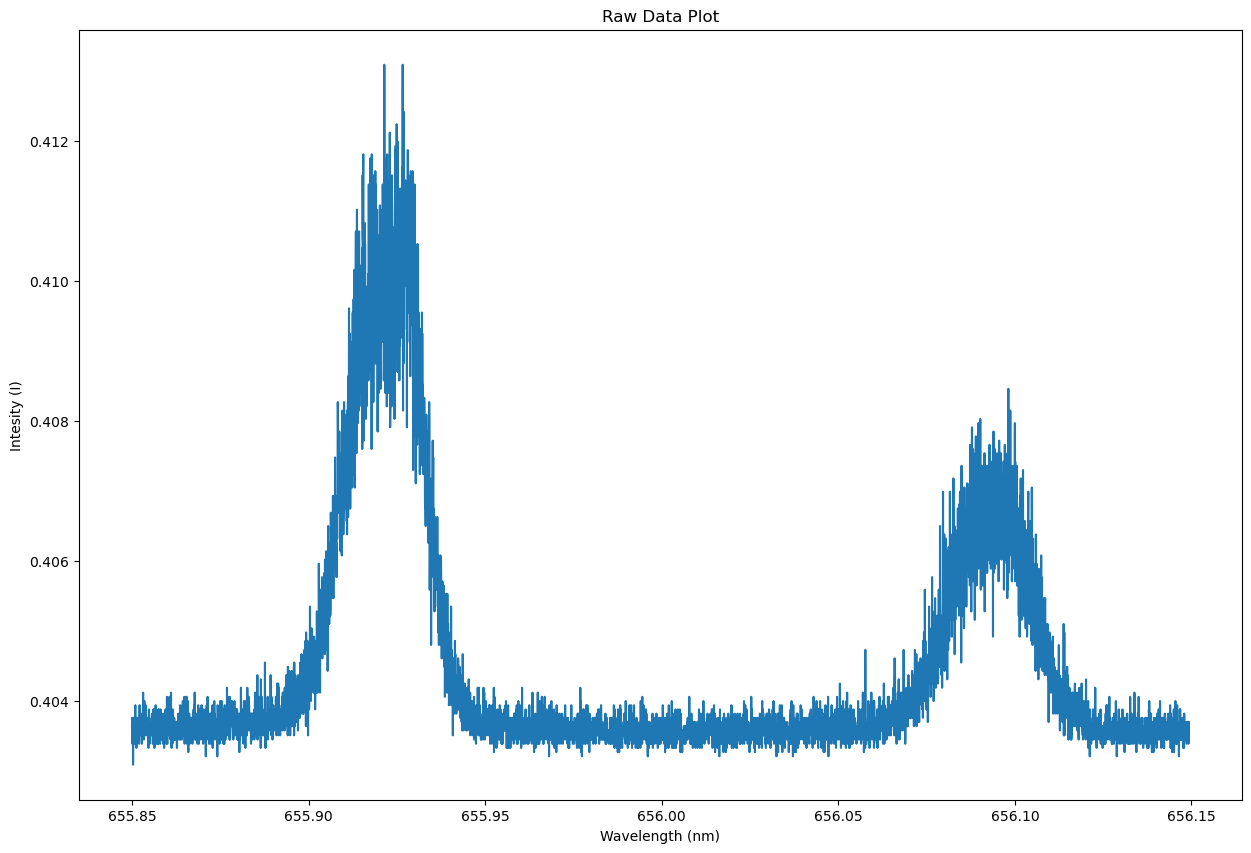

In [1]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df_H2D2 = pd.read_csv("H2D2_Spectra_656.csv") # create pandas dataframe
print(df_H2D2.head()) # print first 5 rows


##############
# Plot data
##############

x_H2D2 = df_H2D2["Wavelength"] # grab column
y_H2D2 = df_H2D2["I"] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intesity (I)")
plt.title("Raw Data Plot")
plt.plot(x_H2D2, y_H2D2)
plt.show()

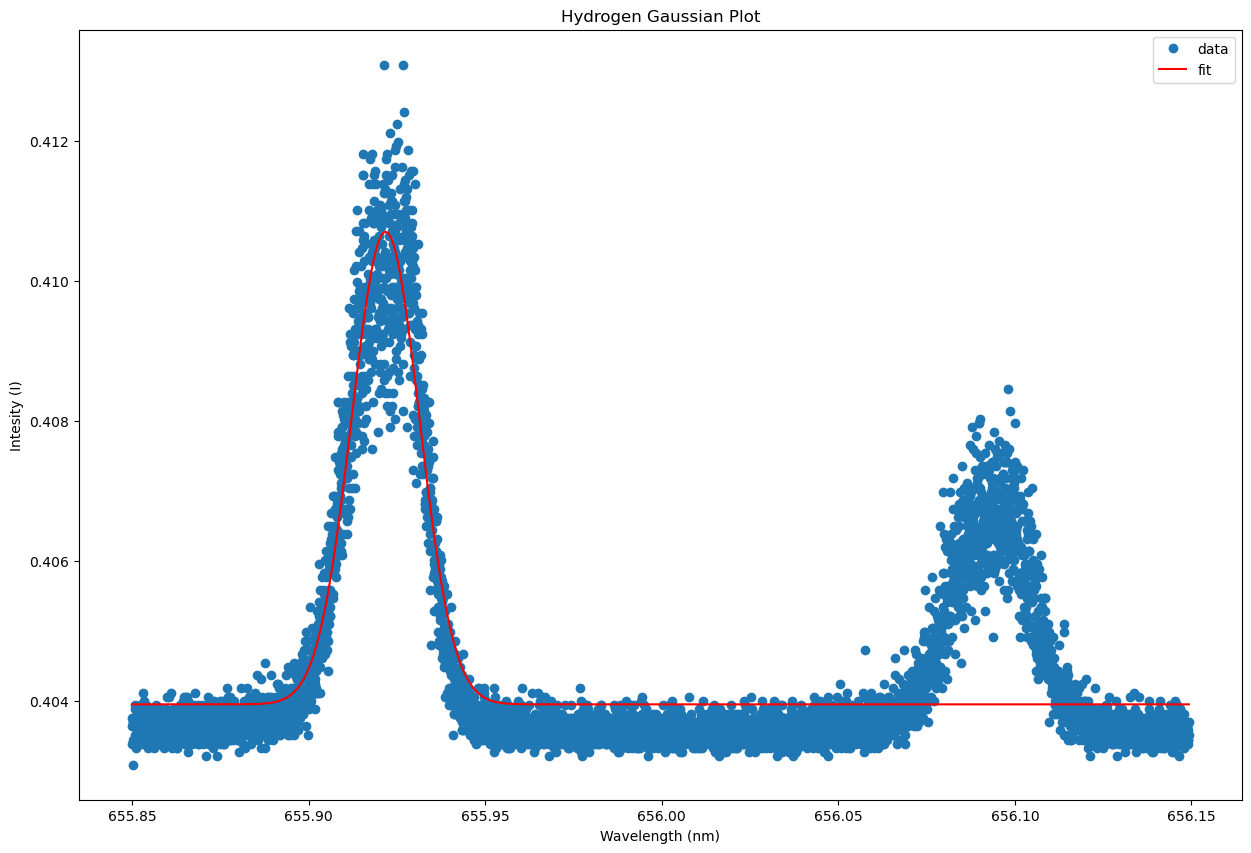

In [2]:
########################
# Input constant values
########################

a_H2 = 0.007 # amplitude                   
mean_H2 = 655.925 # middle of graph                 
h_H2 = .403 # vertical shift                  
sigma_H2 = 0.025 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x_H2D2, a_H2, mean_H2, sigma_H2, h_H2):
    fit = a_H2*np.exp((-(x_H2D2-mean_H2)**2)/(2*sigma_H2**2)) + h_H2
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_H2, pcov_H2 = curve_fit(gaus, x_H2D2, y_H2D2, p0=[a_H2, mean_H2, sigma_H2, h_H2]) # solves for a, mean, sigma, h
y_H2_fit = gaus(x_H2D2, *popt_H2) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_H2D2, y_H2D2, 'o', label="data")
plt.plot(x_H2D2, y_H2_fit, 'r-', label='fit')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intesity (I)")
plt.title("Hydrogen Gaussian Plot")
plt.legend()
plt.show()

In [13]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt_H2[0],
      "\n Fit Mean (Wavelength): ", popt_H2[1],
      "\n Fit Sigma (distance from mean to sides): ", popt_H2[2],
      "\n Fit Height: ", popt_H2[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov_H2)

Fit Amplitude:  0.0067496593864714545 
 Fit Mean (Wavelength):  655.9217890603793 
 Fit Sigma (distance from mean to sides):  0.009589065504702555 
 Fit Height:  0.40395247805822543

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 3.37028986e-09  3.18093374e-12 -2.90681413e-09 -1.06306842e-10]
 [ 3.18093374e-12  8.86463410e-09 -4.51848693e-12  7.65246980e-18]
 [-2.90681413e-09 -4.51848693e-12  9.47130820e-09 -3.02006765e-10]
 [-1.06306842e-10  7.65246980e-18 -3.02006765e-10  1.50340586e-10]]


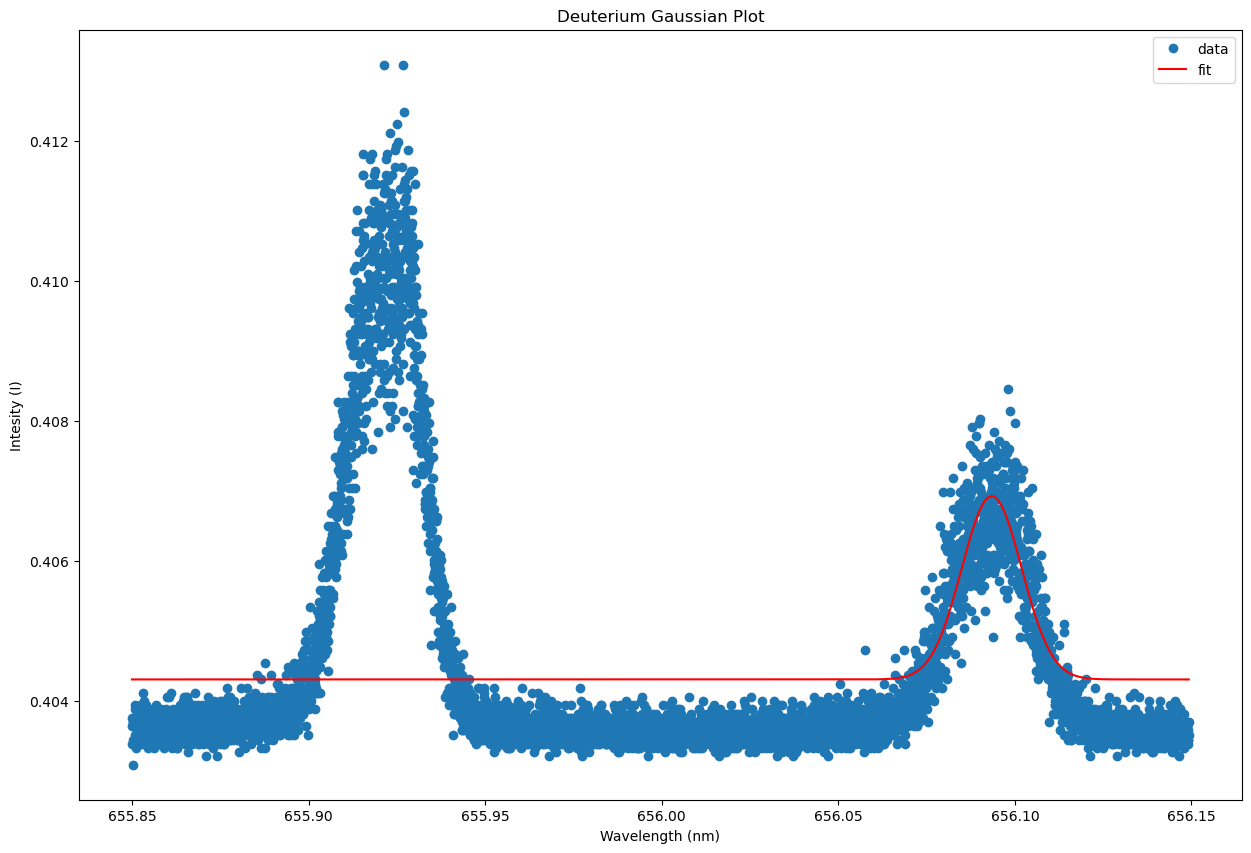

In [3]:
########################
# Input constant values
########################

a_D2 = 0.004 # amplitude                   
mean_D2 = 656.09 # middle of graph                 
h_D2 = .403 # vertical shift                  
sigma_D2 = 0.025 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x_D2, a_D2, mean_D2, sigma_D2, h_D2):
    fit = a_D2*np.exp((-(x_H2D2-mean_D2)**2)/(2*sigma_D2**2)) + h_D2
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_D2, pcov_D2 = curve_fit(gaus, x_H2D2, y_H2D2, p0=[a_D2, mean_D2, sigma_D2, h_D2]) # solves for a, mean, sigma, h
y_D2_fit = gaus(x_H2D2, *popt_D2) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_H2D2, y_H2D2, 'o', label="data")
plt.plot(x_H2D2, y_D2_fit, 'r-', label='fit')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intesity (I)")
plt.title("Deuterium Gaussian Plot")
plt.legend()
plt.show()

In [19]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt_D2[0],
      "\n Fit Mean (Wavelength): ", popt_D2[1],
      "\n Fit Sigma (distance from mean to sides): ", popt_D2[2],
      "\n Fit Height: ", popt_D2[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov_D2)

Fit Amplitude:  0.002618520477782235 
 Fit Mean (Wavelength):  656.0934381861541 
 Fit Sigma (distance from mean to sides):  0.008489282020726853 
 Fit Height:  0.40430836035698164

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 1.38885650e-08  3.38926322e-11 -2.76761940e-08 -3.79891898e-10]
 [ 3.38926322e-11  1.90605298e-07 -1.09802150e-10 -2.66465885e-17]
 [-2.76761940e-08 -1.09802150e-10  2.01883091e-07 -2.46150371e-09]
 [-3.79891898e-10 -2.66465885e-17 -2.46150371e-09  5.37248266e-10]]
